[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Quick Dataset Analysis

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/quick-dataset-analysis.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/quick-dataset-analysis.ipynb)


This notebook shows how to quickly analyze an image dataset for potential issues using fastdup. We'll take you on a high level tour showcasing the core functions of fastdup in the shortest time.

## Installation & Setting Up

This notebook is written to be run on [Google Colab](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb). If you're running fastdup locally, view the installation instructions for your operating system [here](https://visual-layer.readme.io/docs/installation).

In [ ]:
!pip install pip -U
!pip install fastdup matplotlib

## Download Oxford Pets Dataset

For demonstration, we will use a widely available and well curated dataset. For that reason we might not find a lot of issues here. Feel free to swap this dataset with your own.

In [ ]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz -O images.tar.gz
!tar xf images.tar.gz

## Import and Run fastdup

In [1]:
import fastdup
fastdup.__version__

'0.903'

Let's start by creating a `Fastdup` object.

+ `work_dir` - path to store artifacts from the run. 

+ `input_dir` - path to your images folder.

In [ ]:
fd = fastdup.create(work_dir="fastdup_work_dir/", input_dir="images/")

In [2]:
fd.run()

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-03-15 18:49:07 [INFO] Going to loop over dir images
2023-03-15 18:49:07 [INFO] Found total 7390 images to run on
2023-03-15 18:49:07 [ERROR] Failed to read image images/Abyssinian_34.jpgtes 0 Features
2023-03-15 18:49:13 [ERROR] Failed to read image images/Egyptian_Mau_139.jpgs 0 Features
2023-03-15 18:49:13 [ERROR] Failed to read image images/Egyptian_Mau_145.jpg
2023-03-15 18:49:13 [ERROR] Failed to read image images/Egyptian_Mau_167.jpgs 0 Features
2023-03-15 18:49:13 [ERROR] Failed to read image images/Egyptian_Mau_177.jpg
2023-03-15 18:49:13 [ERROR] Failed to read image images/Egyptian_Mau_191.jpgs 0 Features
2023-03-15 18:49:27 [INFO] Found total 7390 images to run ontimated: 0 Minutes 0 Features
2023-03-15 18:49:28 [INFO] 1039) Finished write_index() NN model
2023-03-15 18:49:28 [INFO] Stored nn model index file fastdup_work_dir/nnf.index
2023-03-15 18:49:29 [INFO] Total time took 21607 ms
2023-03-15

## View Run Summary

In [3]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 7390 images
    Valid images are 99.92% (7,384) of the data, invalid are 0.08% (6) of the data
    For a detailed analysis, use `.invalid_instances()`.

    Similarity:  1.00% (74) belong to 3 similarity clusters (components).
    99.00% (7,316) images do not belong to any similarity cluster.
    Largest cluster has 6 (0.08%) images.
    For a detailed analysis, use `.connected_components()`
(similarity threshold used is 0.9, connected component threshold used is 0.96).

    Outliers: 6.13% (453) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.


['Dataset contains 7390 images',
 'Valid images are 99.92% (7,384) of the data, invalid are 0.08% (6) of the data',
 'For a detailed analysis, use `.invalid_instances()`.\n',
 'Similarity:  1.00% (74) belong to 3 similarity clusters (components).',
 '99.00% (7,316) images do not belong to any similarity cluster.',
 'Largest cluster has 6 (0.08%) images.',
 'For a detailed analysis, use `.connected_components()`\n(similarity threshold used is 0.9, connected component threshold used is 0.96).\n',
 'Outliers: 6.13% (453) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.']

## Invalid Images

Get a list of broken images.

In [4]:
fd.invalid_instances()

filename  fastdup_id            error_code  is_valid
0     Abyssinian_34.jpg         135  ERROR_ZERO_SIZE_FILE     False
1  Egyptian_Mau_139.jpg        2240  ERROR_ZERO_SIZE_FILE     False
2  Egyptian_Mau_145.jpg        2247  ERROR_ZERO_SIZE_FILE     False
3  Egyptian_Mau_167.jpg        2268  ERROR_ZERO_SIZE_FILE     False
4  Egyptian_Mau_177.jpg        2278  ERROR_ZERO_SIZE_FILE     False
5  Egyptian_Mau_191.jpg        2293  ERROR_ZERO_SIZE_FILE     False

## Duplicate Image Pairs

Duplicate image pairs are computed based on the cosine distance of an image pair. View the docs [here](https://visual-layer.readme.io/docs/v1-api#duplicates_gallery).

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 112.30it/s]


Stored similarity visual view in  fastdup_work_dir/galleries/duplicates.html



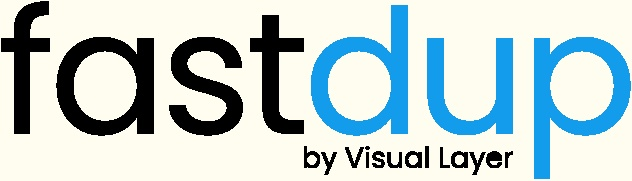
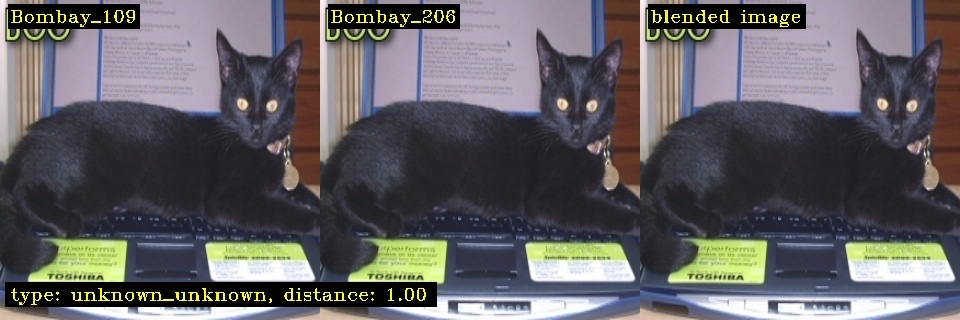
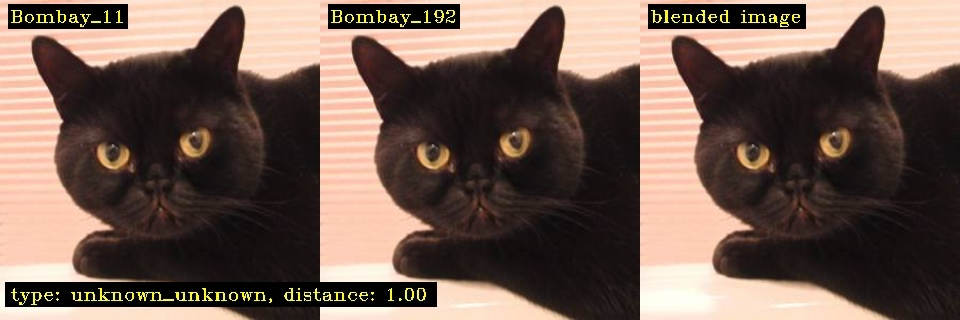
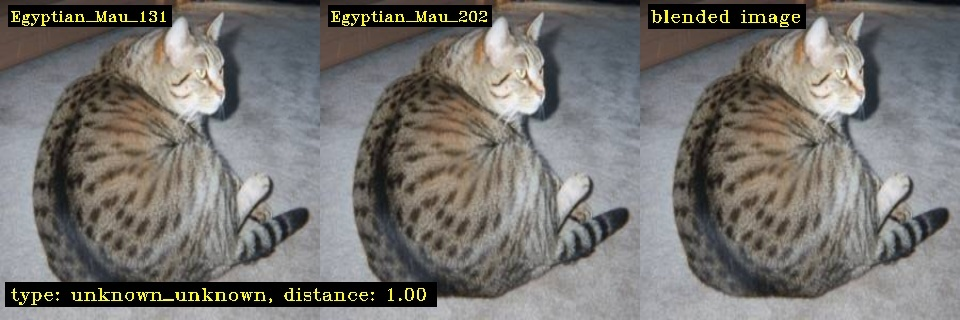
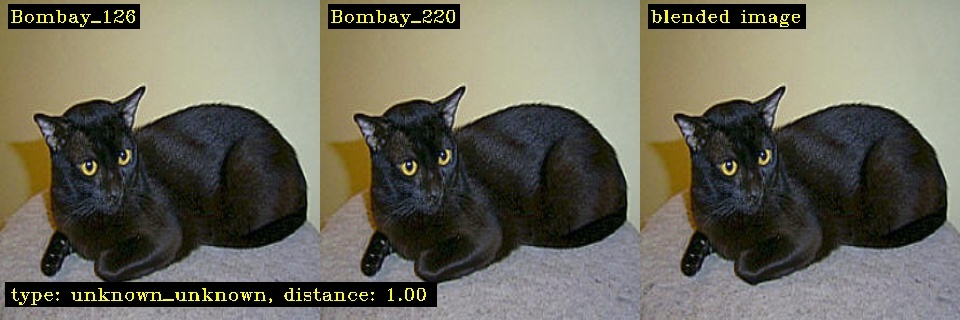
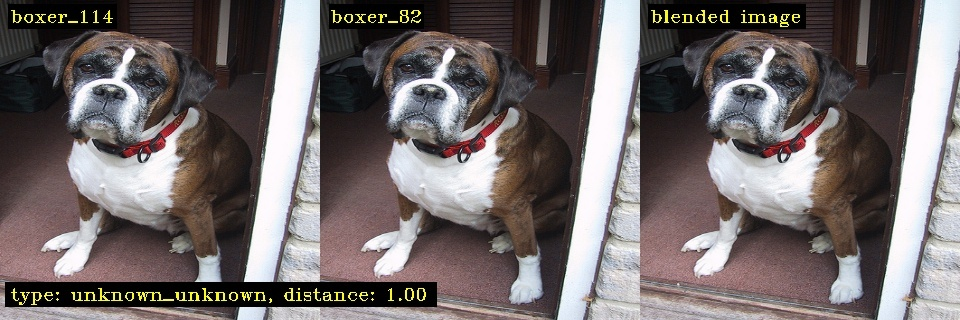
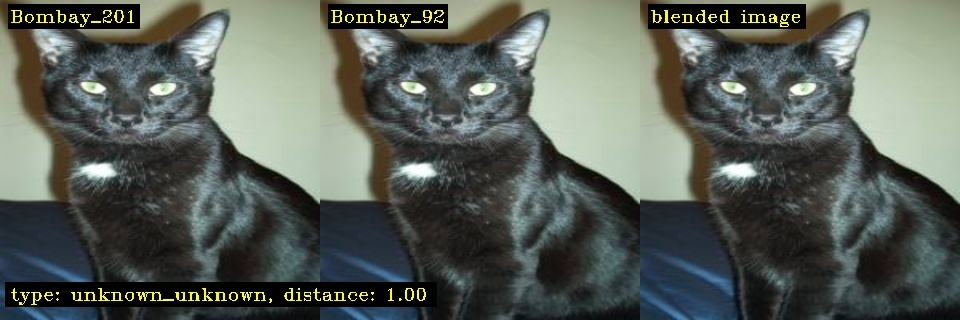
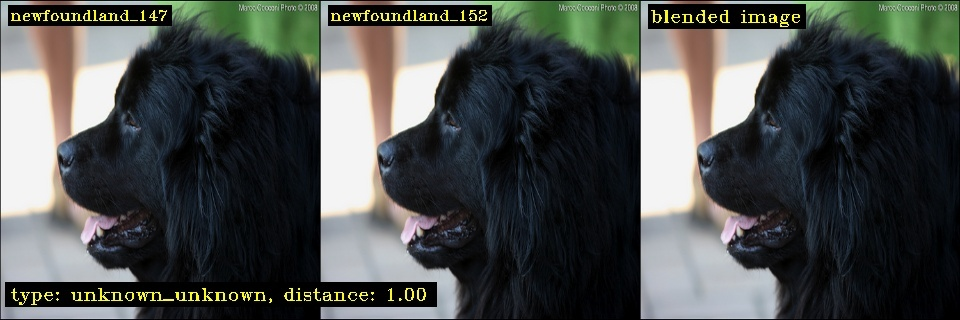
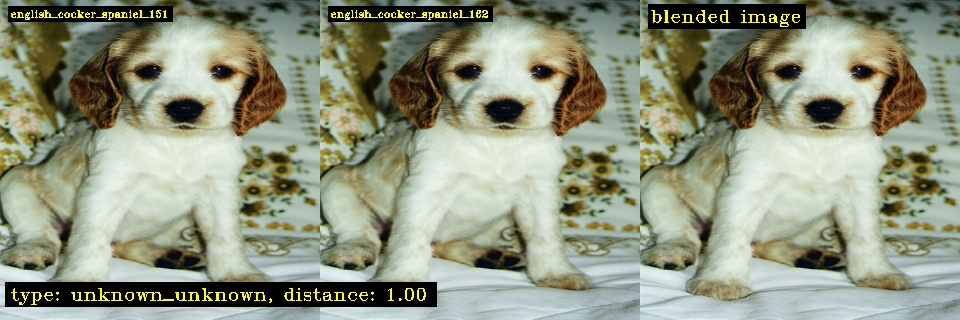
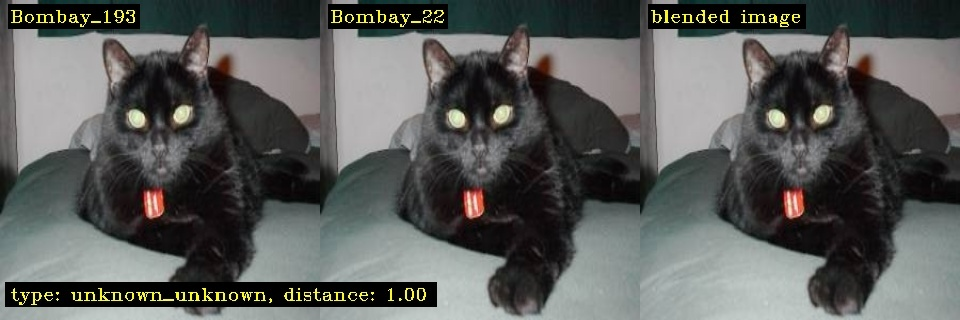
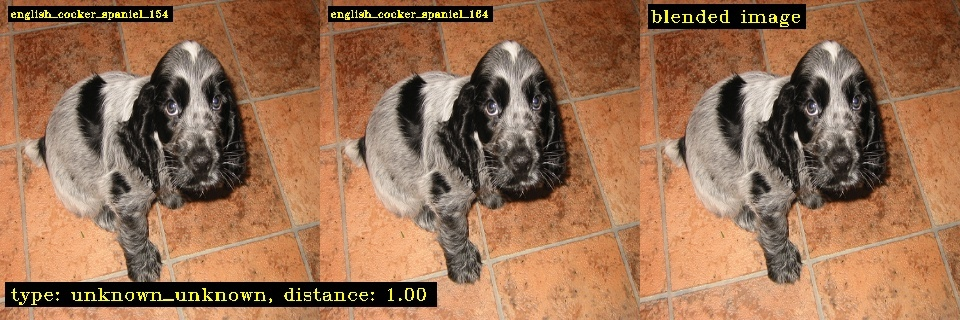
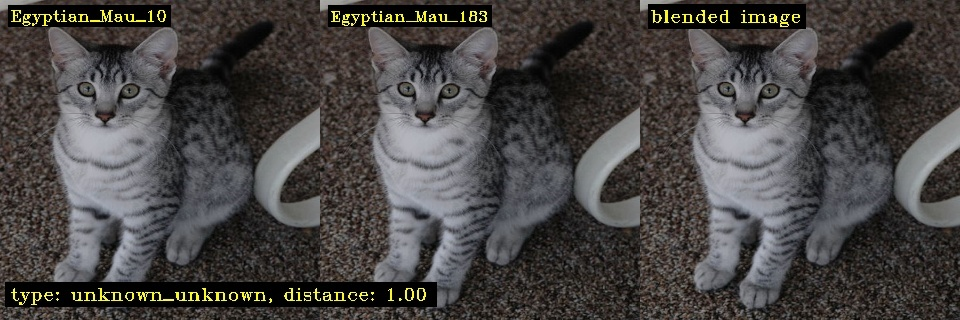
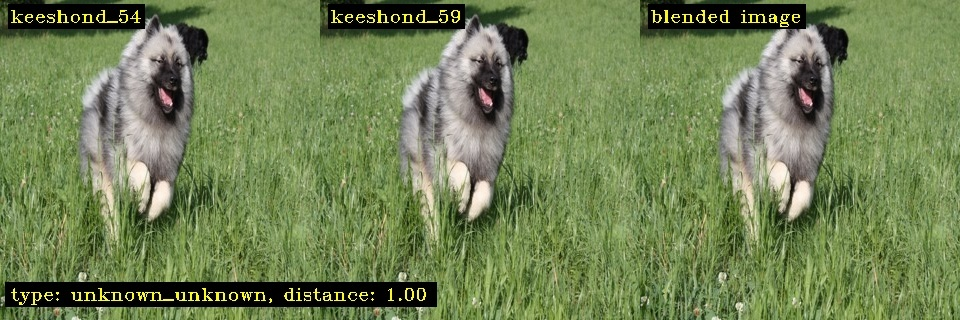
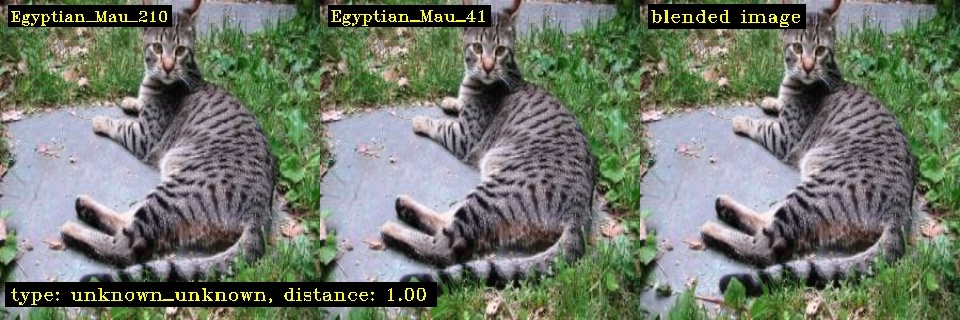
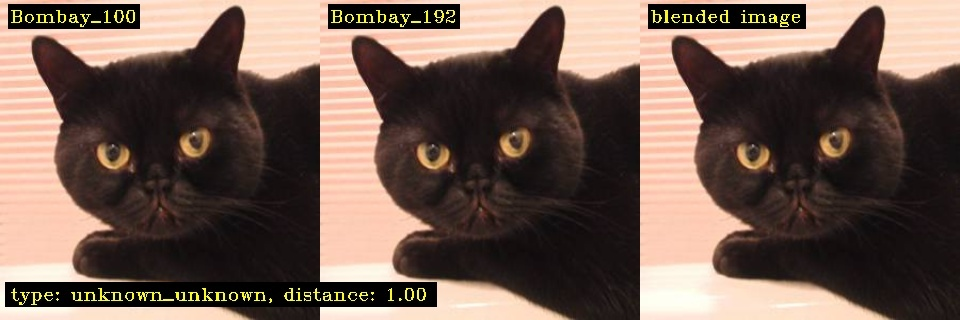
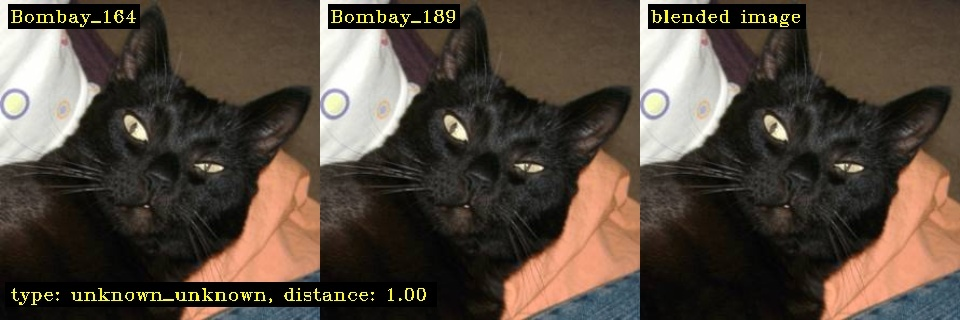
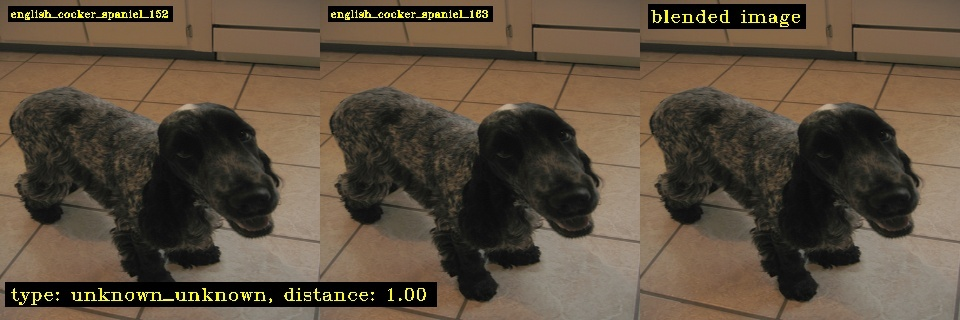
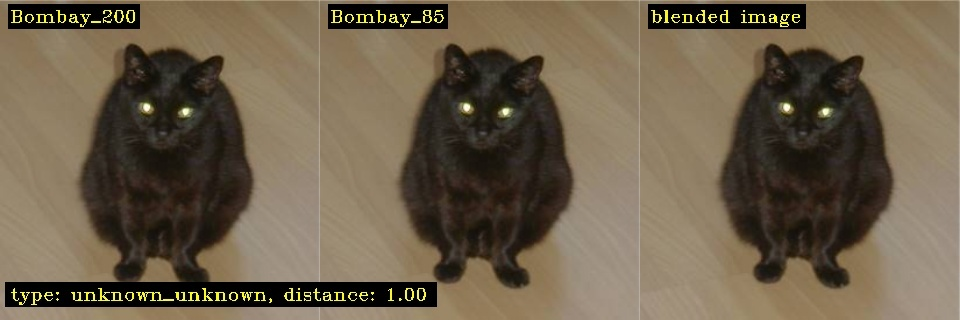
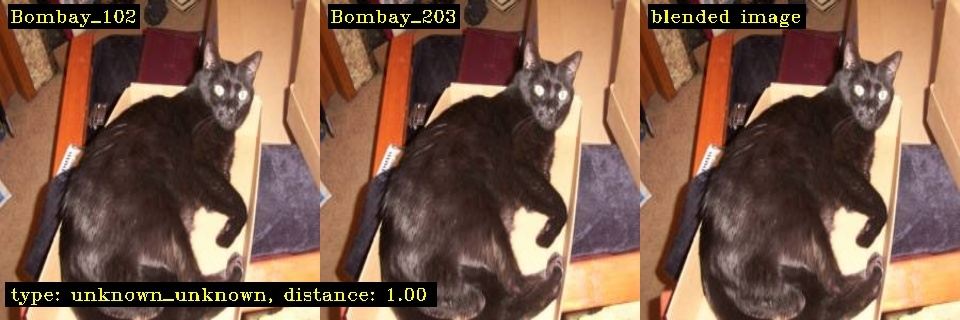
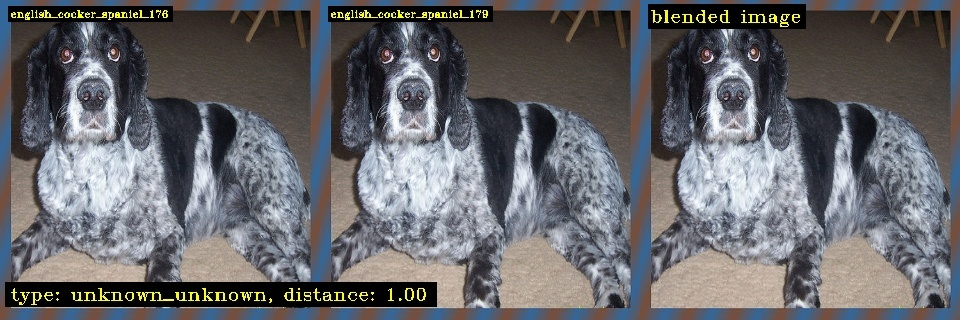

In [5]:
fd.vis.duplicates_gallery()

## Outliers

Outliers are computed based on the distance of the image compared to other images in the dataset. View the docs [here](https://visual-layer.readme.io/docs/v1-api#outliers_gallery).

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 24679.64it/s]


Stored outliers visual view in  fastdup_work_dir/galleries/outliers.html



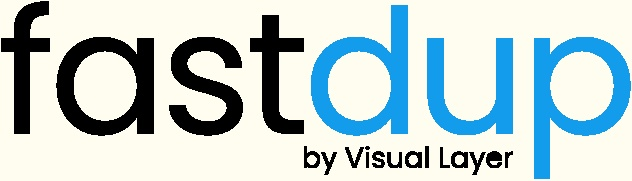
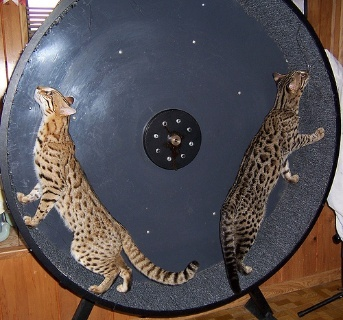
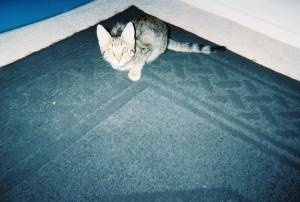
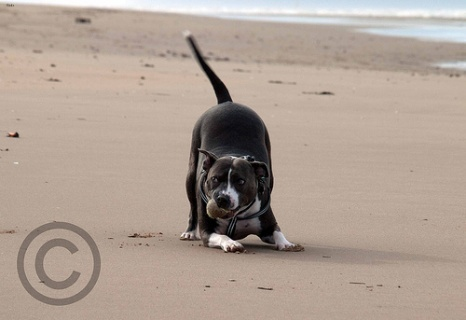
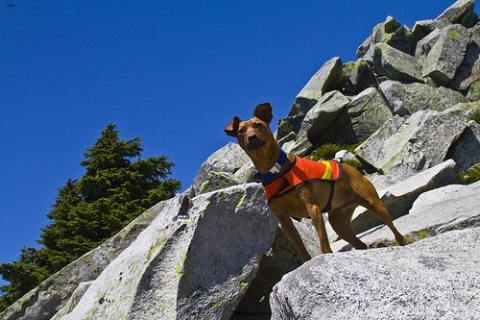
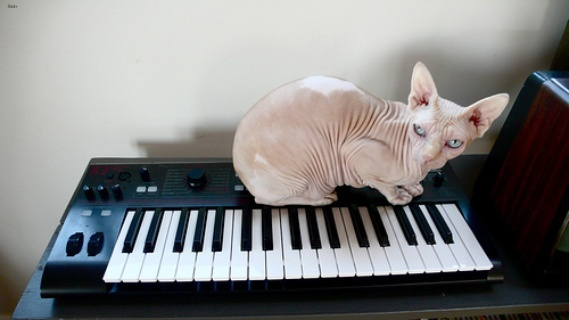
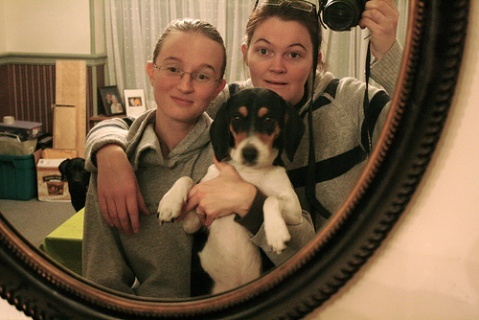
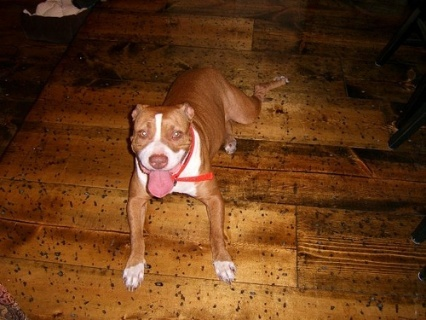
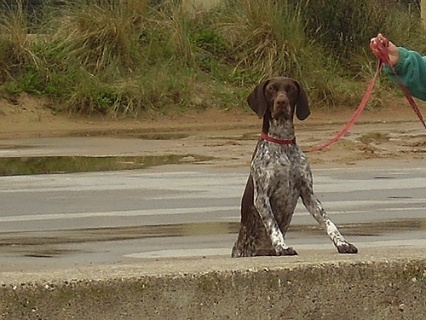
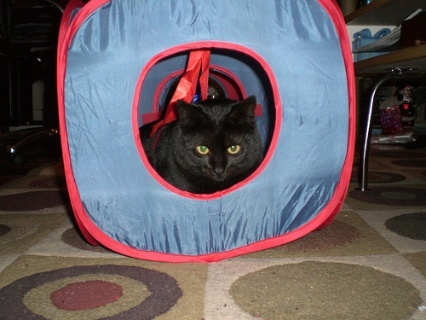
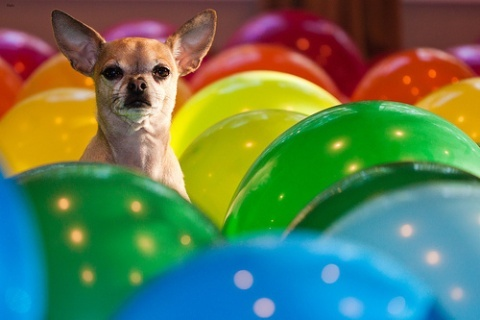
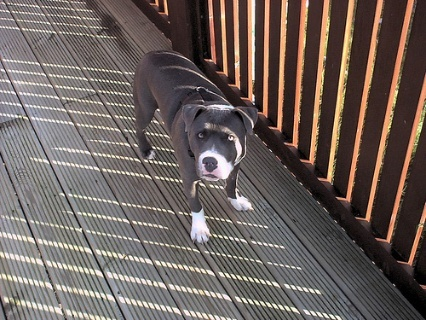
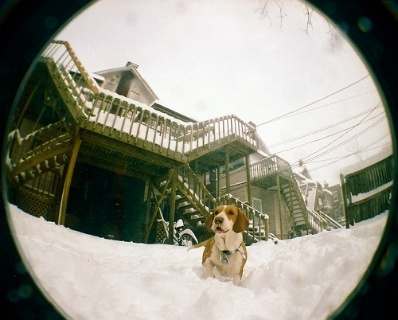
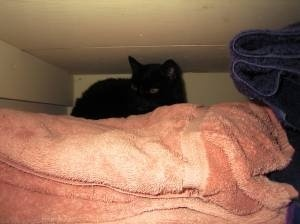
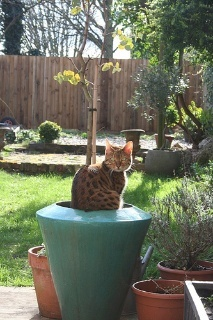
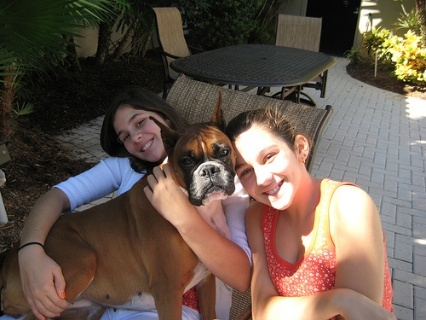
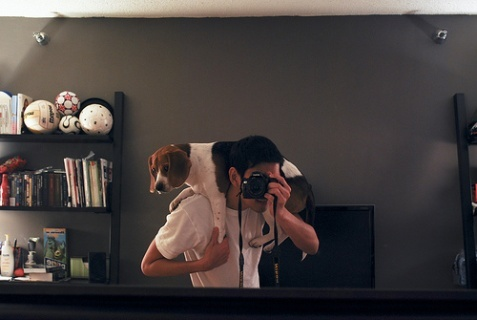
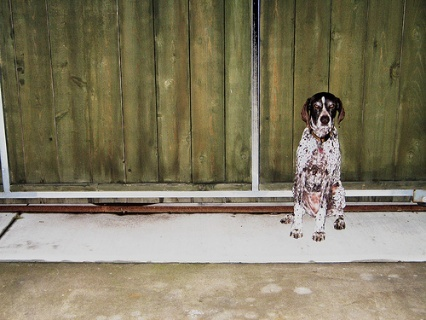
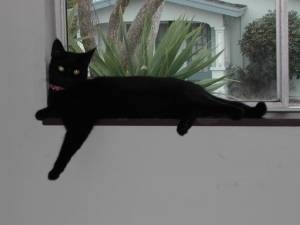
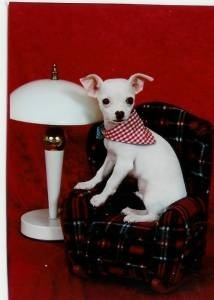
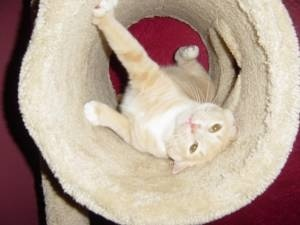

In [6]:
fd.vis.outliers_gallery() 

## Dark, Bright and Blurry Images

You can also visualize the dataset sorted by a specific metric. View the docs [here](https://visual-layer.readme.io/docs/v1-api#duplicates_gallery).

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 262.41it/s]


Stored mean visual view in  fastdup_work_dir/galleries/mean.html



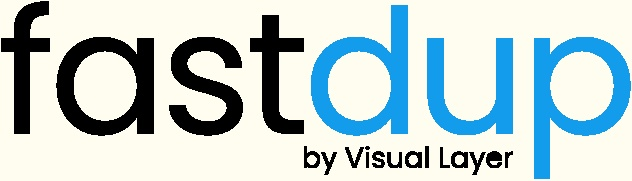
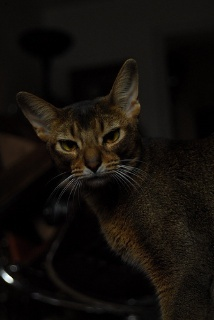
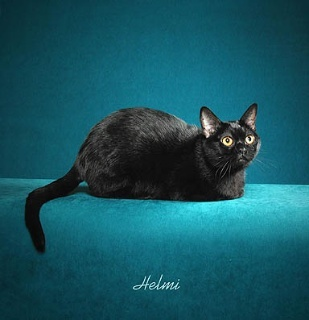
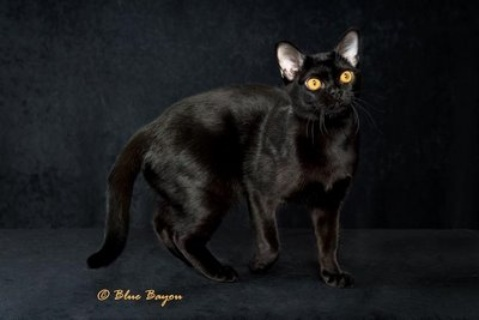
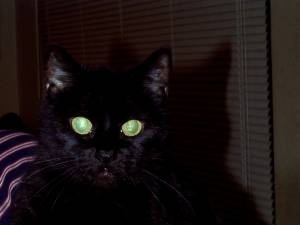
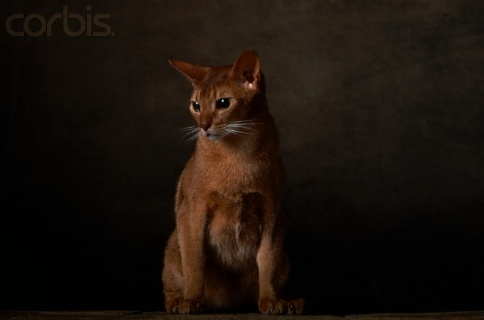
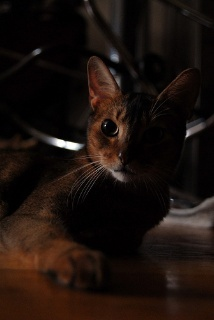
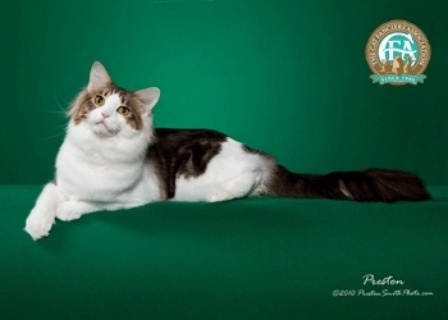
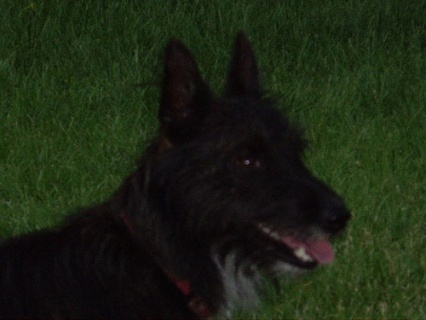
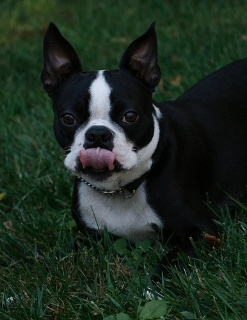
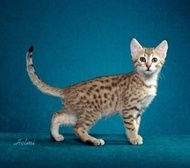
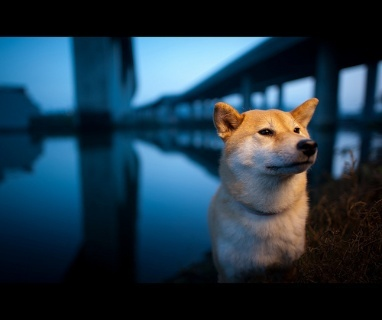
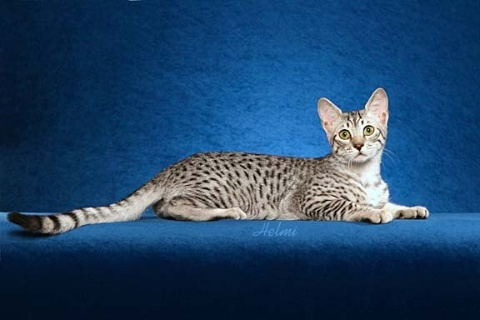
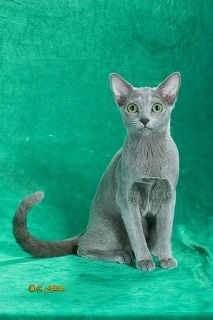
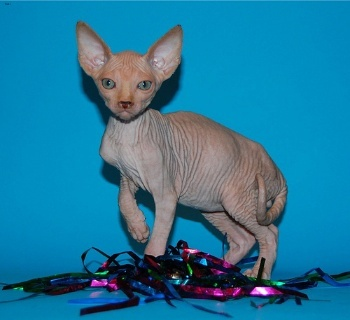
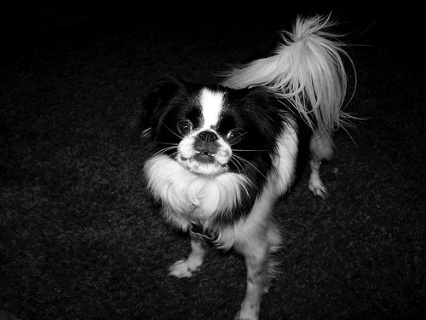
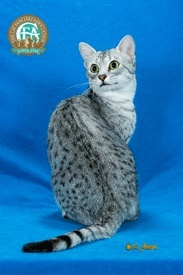
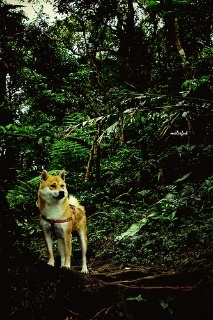
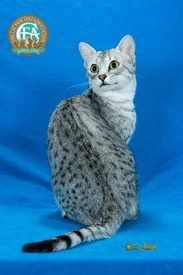
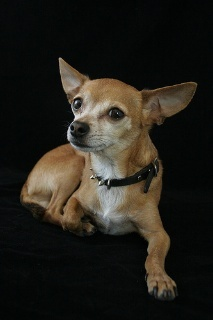
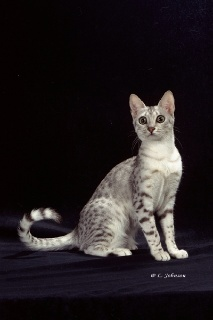
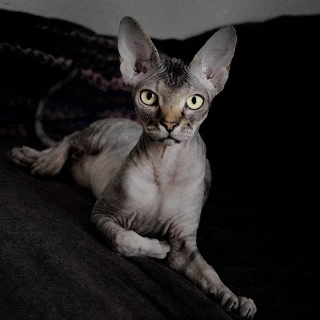
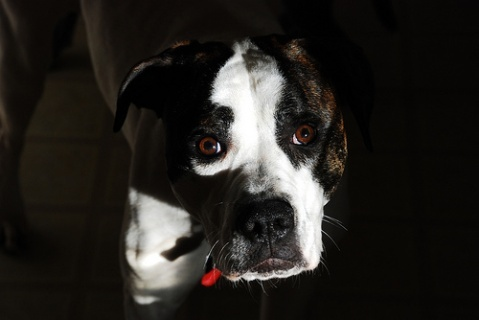
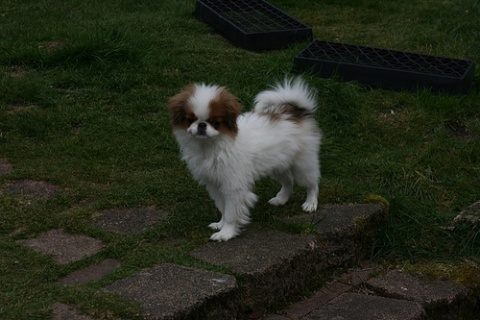
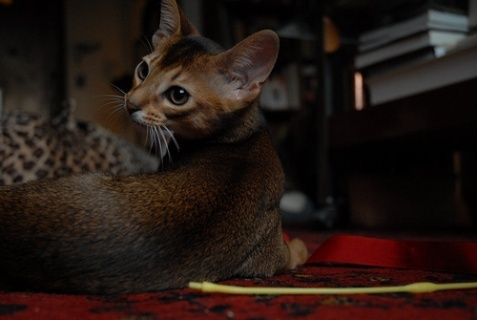
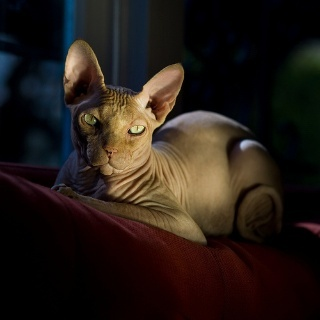

In [7]:
fd.vis.stats_gallery(metric='dark')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 315.85it/s]


Stored mean visual view in  fastdup_work_dir/galleries/mean.html



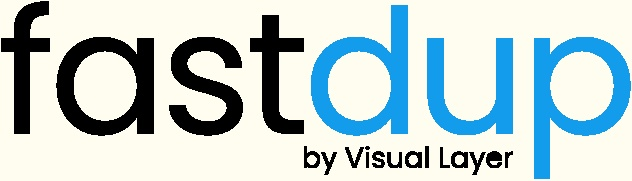
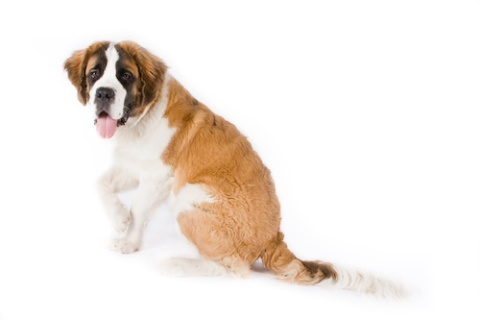
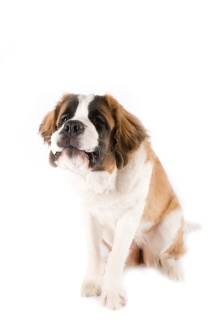
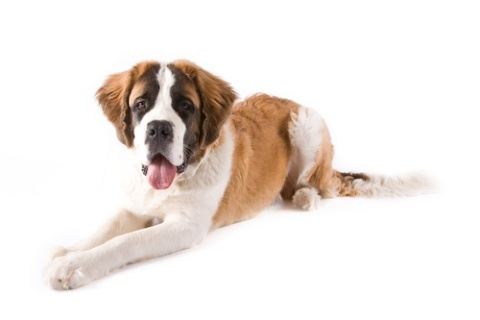
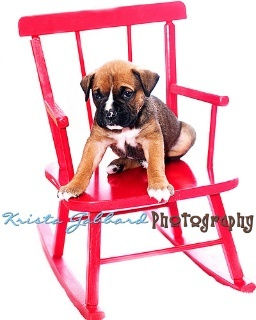
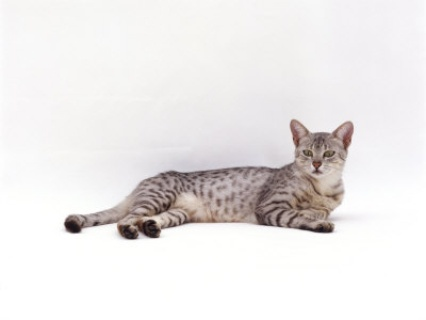
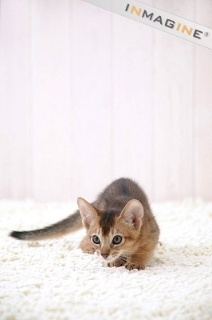
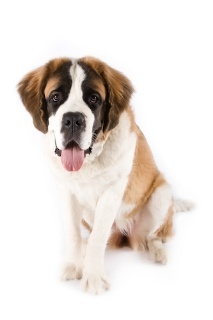
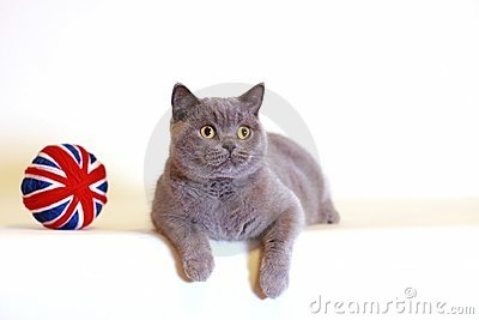
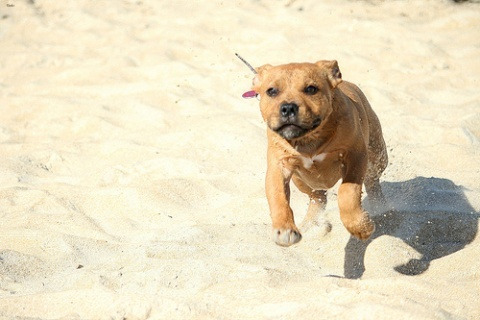
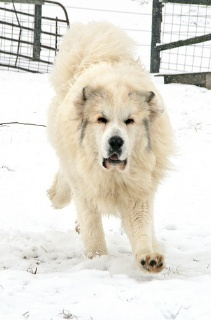
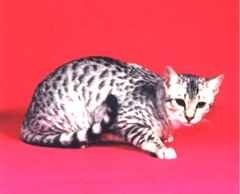
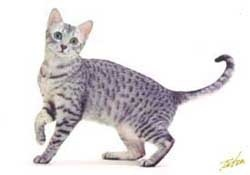
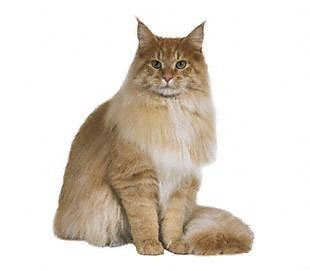
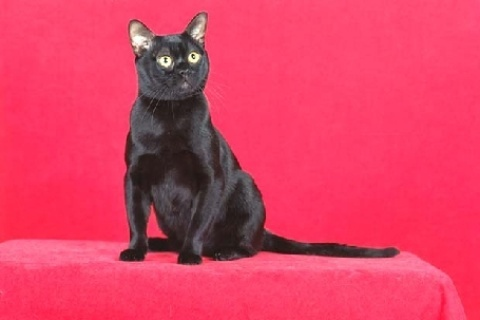
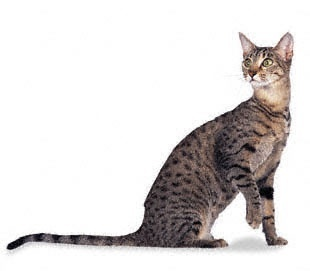
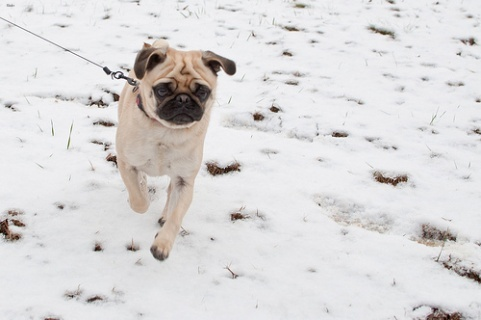
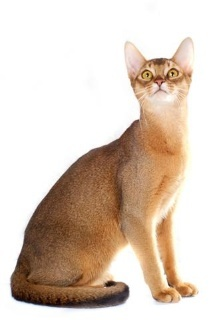
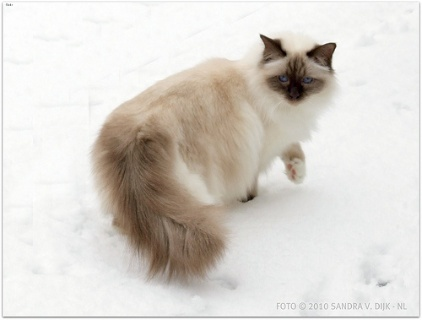
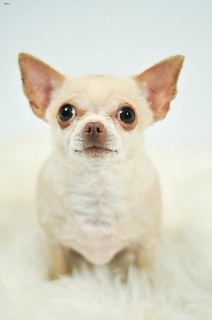
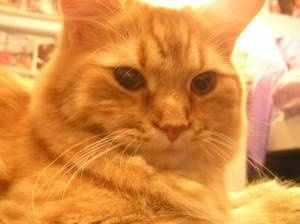
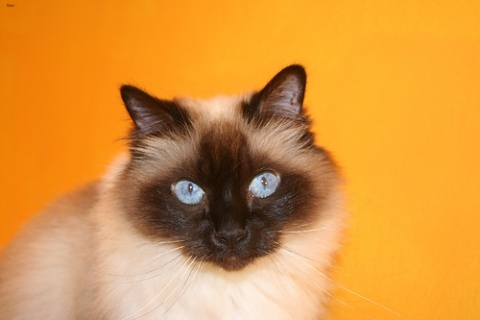
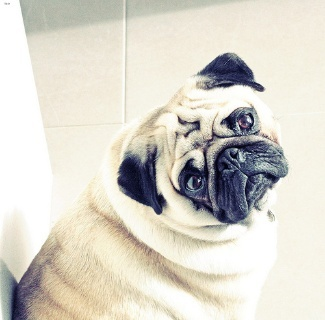
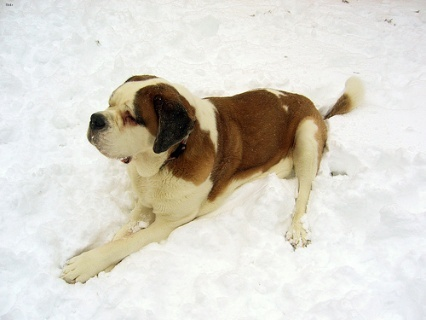
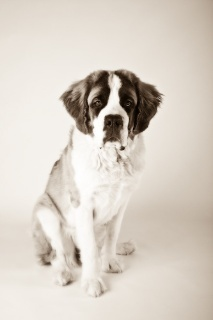
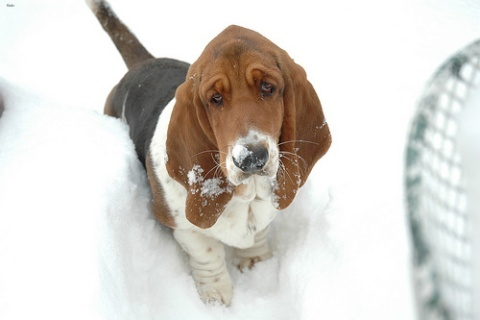

In [8]:
fd.vis.stats_gallery(metric='bright')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 660.86it/s]

Stored blur visual view in  fastdup_work_dir/galleries/blur.html



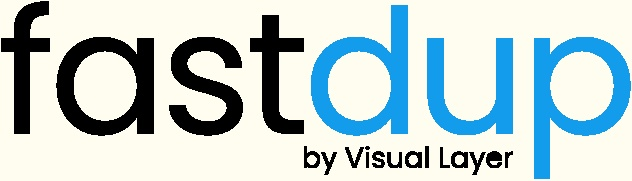
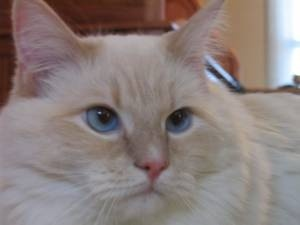
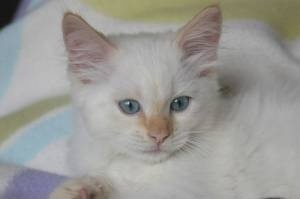
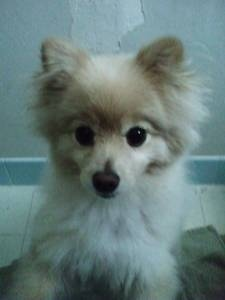
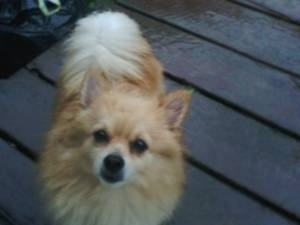
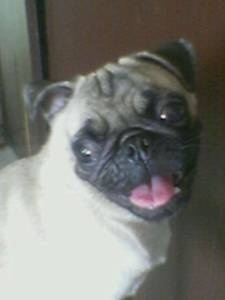
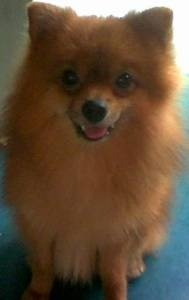
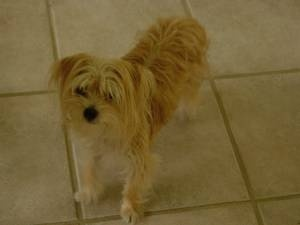
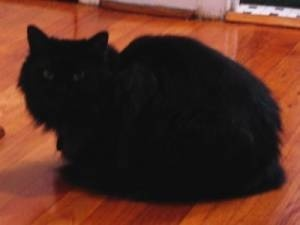
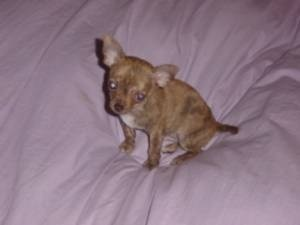
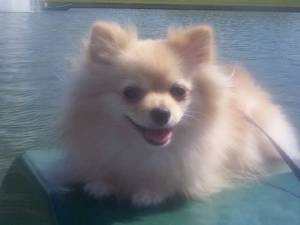
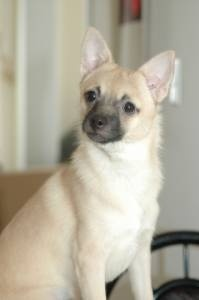
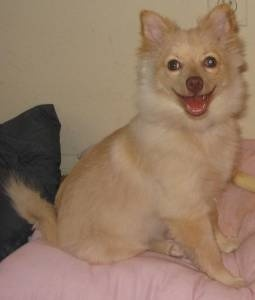
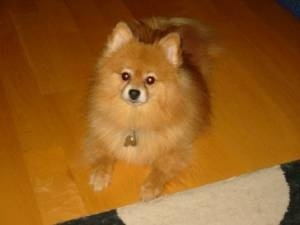
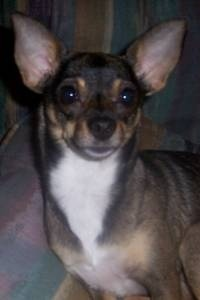
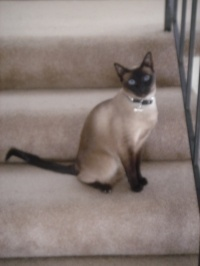
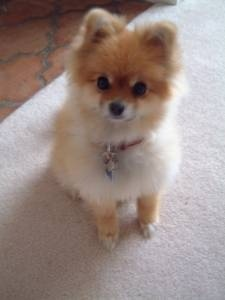
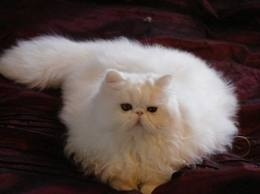
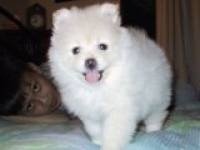
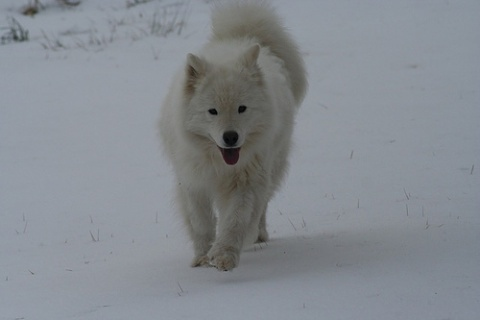
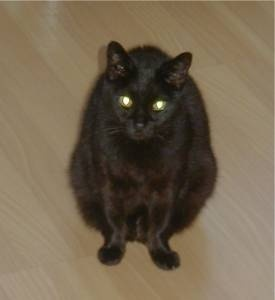
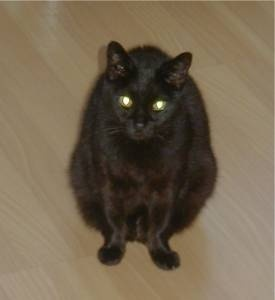
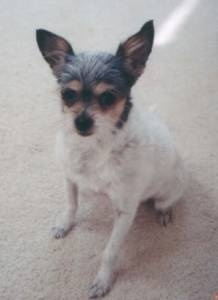
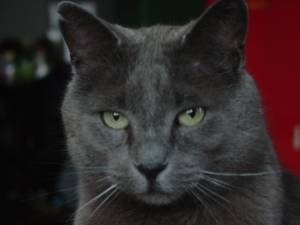
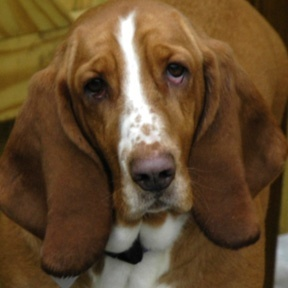
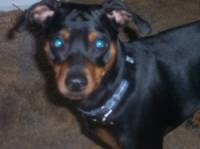

In [9]:
fd.vis.stats_gallery(metric='blur')

## Image Clusters

Visualize similar looking images as clusters. View the docs [here](https://visual-layer.readme.io/docs/v1-api#component_gallery).

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 88.66it/s]


Finished OK. Components are stored as image files fastdup_work_dir/galleries/components_[index].jpg
Stored components visual view in  fastdup_work_dir/galleries/components.html
Execution time in seconds 0.8



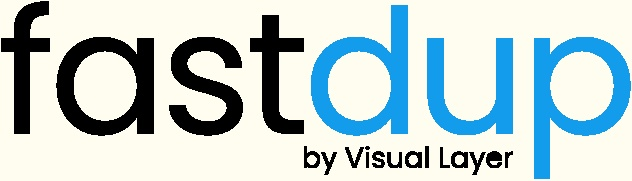
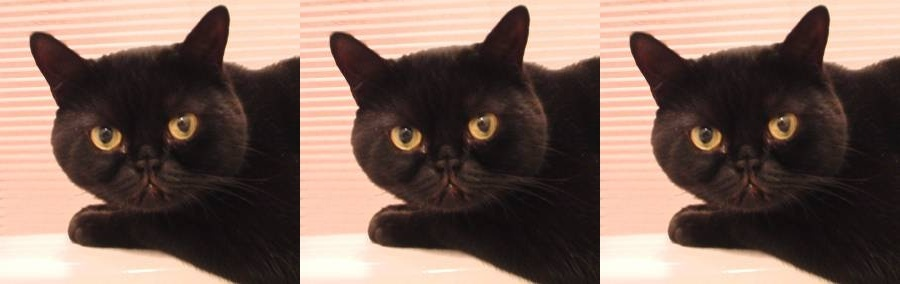
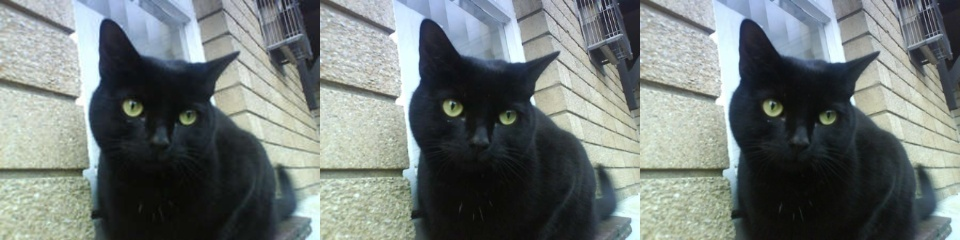
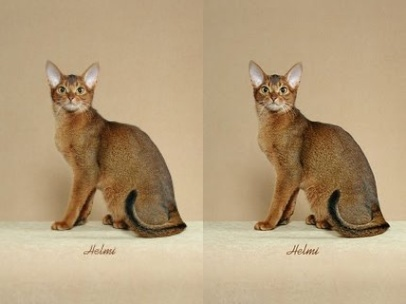
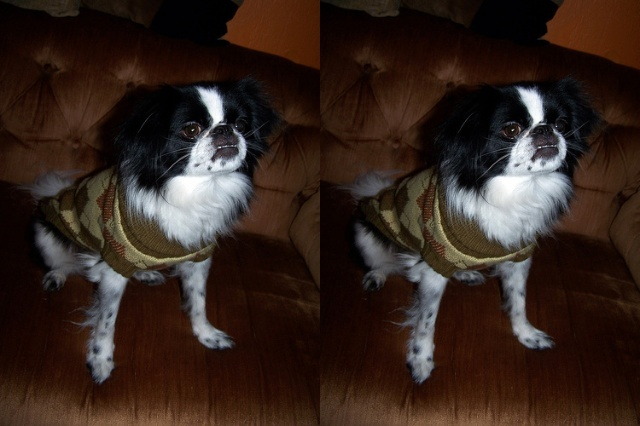
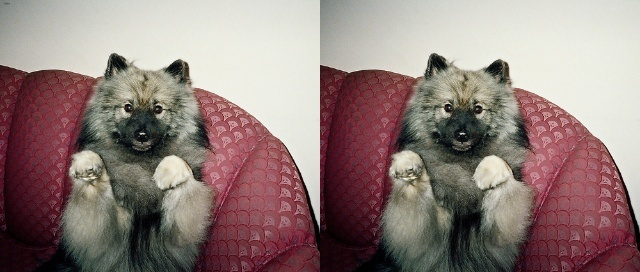
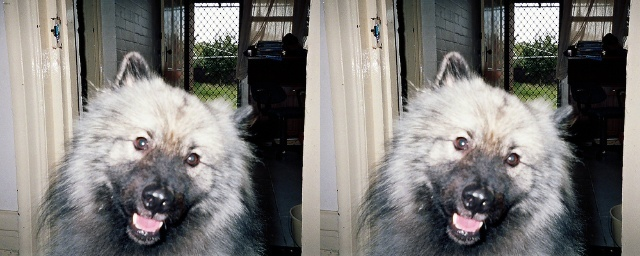
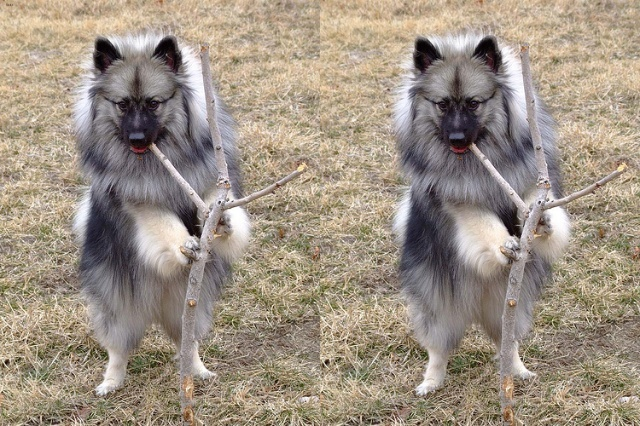
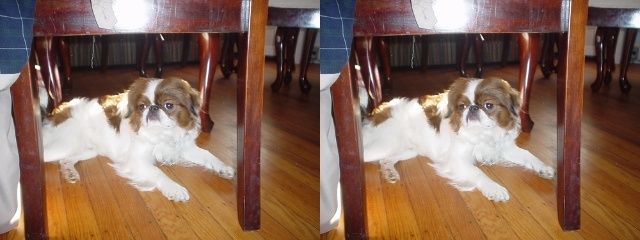
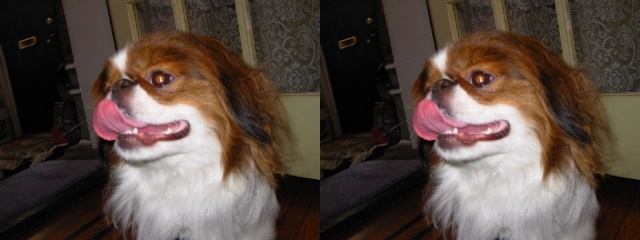
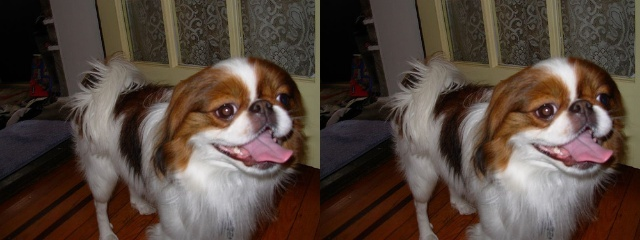
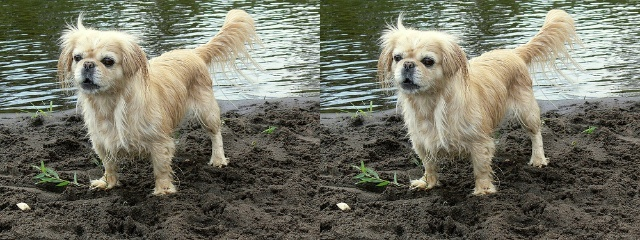
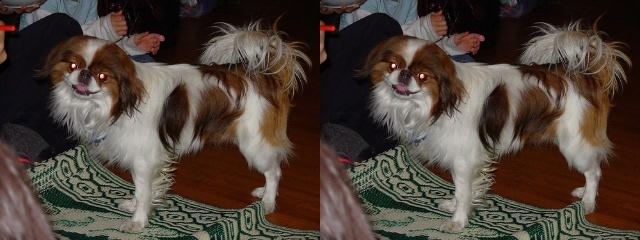
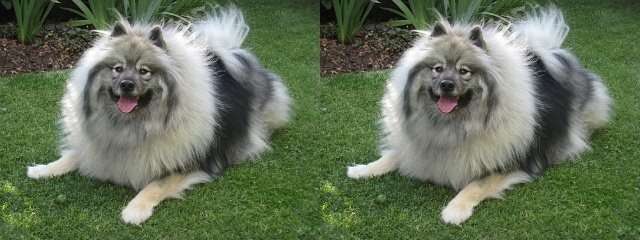
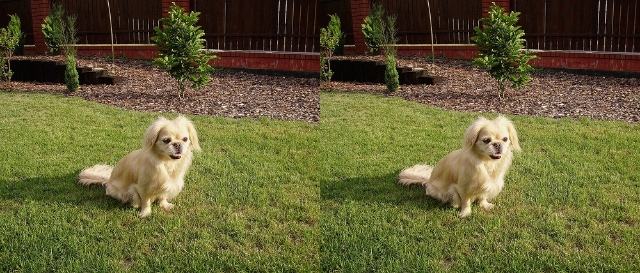
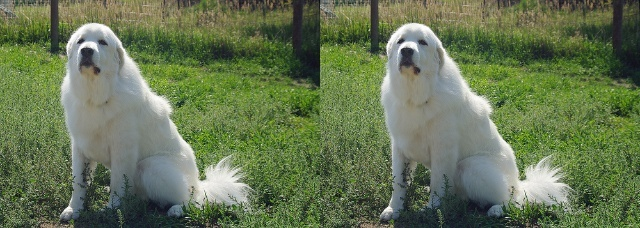
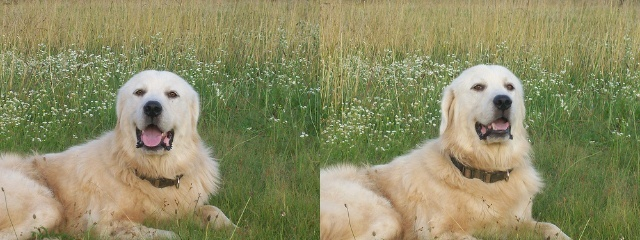
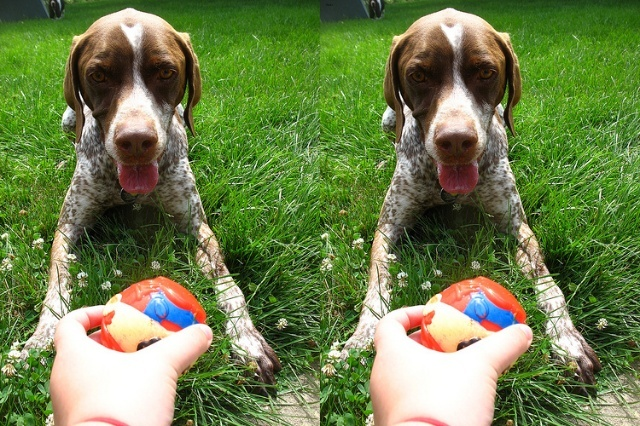
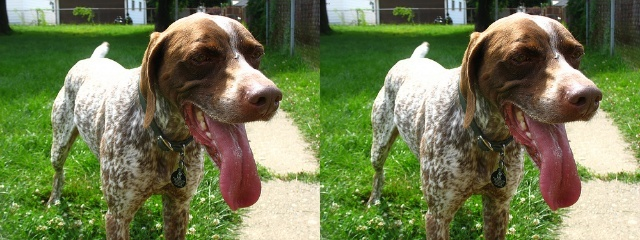
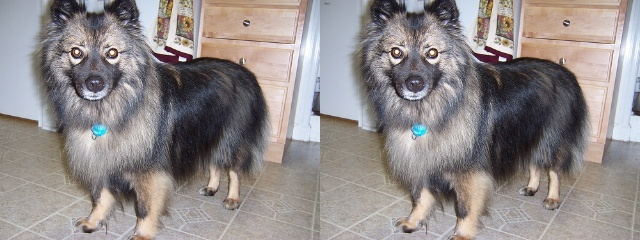
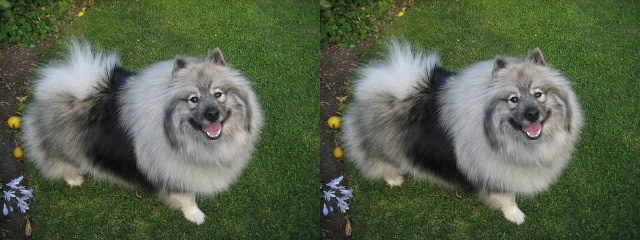

In [10]:
fd.vis.component_gallery()